In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import numpy as np 
import pandas as pd 
import os

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Dense, Embedding, LSTM, Input, Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
import re

## Training Data 

In [ ]:
df_original = pd.read_csv("gdrive/My Drive/AAT/train 4.csv", sep=",")

In [ ]:
df_original.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df = pd.DataFrame.copy(df_original)

In [ ]:
df = df.replace("neutral", 0)

In [ ]:
df = df.replace("negative", -1)

In [ ]:
df = df.replace("positive", 1)

In [ ]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,-1
2,088c60f138,my boss is bullying me...,bullying me,-1
3,9642c003ef,what interview! leave me alone,leave me alone,-1
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",-1


In [ ]:
df['text'] = df['text'].astype(str)

In [ ]:
num_words = 5000
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ')
# tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?[\\]^_`{|}~\t\n',lower=True,split=' ')

print(df['text'][0])
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
print(X[0])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

max_length_of_text = 100
X = pad_sequences(X, maxlen=max_length_of_text)

print(word_index)
print("Padded Sequences: ")
print(X)
print(X[0])

 I`d have responded, if I were going
[1, 165, 19, 73, 1, 150, 48]
Found 26598 unique tokens.
{'i': 1, 'to': 2, 'the': 3, 'a': 4, 'my': 5, 'it': 6, 'you': 7, 'and': 8, 'is': 9, 'in': 10, 'for': 11, 's': 12, 'of': 13, 't': 14, 'that': 15, 'on': 16, 'me': 17, 'so': 18, 'have': 19, 'but': 20, 'm': 21, 'just': 22, 'day': 23, 'with': 24, 'be': 25, 'at': 26, 'not': 27, 'was': 28, 'all': 29, 'now': 30, 'can': 31, 'good': 32, 'this': 33, 'out': 34, 'up': 35, 'get': 36, 'no': 37, 'are': 38, 'like': 39, 'go': 40, 'http': 41, 'your': 42, 'do': 43, 'work': 44, 'today': 45, 'love': 46, 'too': 47, 'going': 48, 'got': 49, 'we': 50, 'lol': 51, 'what': 52, 'happy': 53, 'one': 54, 'from': 55, 'u': 56, 'time': 57, 'know': 58, 'there': 59, 'really': 60, 'back': 61, 'will': 62, 'com': 63, 'im': 64, 'don': 65, 'about': 66, 'am': 67, 'had': 68, 'its': 69, 'see': 70, 'some': 71, 'they': 72, 'if': 73, 'night': 74, 'new': 75, 'home': 76, '2': 77, 'want': 78, 'well': 79, 'how': 80, 'think': 81, 'as': 82, 'still':

In [ ]:
y = df['sentiment']
X_train, X_validation, y_train, y_validation = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_validation.shape,y_validation.shape)

(21984, 100) (21984,)
(5497, 100) (5497,)


## Testing Data

In [ ]:
test_df = pd.read_csv("gdrive/My Drive/AAT/final_dataset.csv", sep=",")

In [ ]:
test_df.head()

,username,full_name,twitter_url,tweet_text,tweet_time,number_of_likes,no_of_retweets,no_of_replies,mentions,no_of_mentions,hashtags,no_of_hashtags,call_to_action,image_url
0,malcolm_thecat,Malcolm the Cat,https://twitter.com/Malcolm_theCat/status/1305...,"""Friends! Baby Dog is “Teething”, which means ...",2020-09-12 23:12:00,"1,742",147,124,NaN,0,CatsOfTwitter | cats | dogsoftwitter | dogs | ...,6,NaN,NaN
1,fiditoboutique,Fidito's Boutique,https://twitter.com/fiditoboutique/status/1305...,"""#cats #catstagram Reusable Dog Bed Mat https",2020-09-13 08:59:00,NaN,NaN,0,NaN,0,cats | catstagram,2,NaN,https://pbs.twimg.com/media/Ehzo_-gWoAEiALJ.jpg
2,jackmespinosa1,The beauty of China,https://twitter.com/JackMEspinosa1/status/1305...,"""Smart cat. No one's playing with me. I play b...",2020-09-13 21:11:00,1,NaN,0,thesebosscats,1,cat | CatsOfTwitter,2,NaN,NaN
3,funnycat96,funny cats,https://twitter.com/funnycat96/status/13050771...,"""Nice place to sleep. #cat #cats #CatsOfTwitte...",2020-09-13 02:33:00,130,23,2,NaN,0,cat | cats | CatsOfTwitter | Caturday,4,NaN,NaN
4,ladymihaelatarg,Lady Mihaela,https://twitter.com/LadyMihaelaTarg/status/130...,"""Meanwhile, on the same road...\n#lol #animals...",2020-09-12 08:41:00,1,NaN,0,NaN,0,lol | animals | Western,3,NaN,NaN


In [ ]:
# num_words = 10000
# tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ')

print(test_df['tweet_text'][0])
#tokenizer.fit_on_texts(test_df['tweet'].values)
X_test = tokenizer.texts_to_sequences(test_df['tweet_text'].values)
print(X_test[0])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

max_length_of_text = 100
X_test = pad_sequences(X_test, maxlen=max_length_of_text)

print(word_index)
print("Padded Sequences: ")
print(X_test)
print(X_test[0])

"Friends! Baby Dog is “Teething”, which means he wants to chew EVERYTHING. Mum buys him special things for dogs to chew but he prefers to chew the carpet. Mum says he is Destroying the House. #CatsOfTwitter #cats #dogsoftwitter #dogs #puppiesoftwitter #SundayThoughts… https
[213, 297, 503, 9, 385, 649, 92, 418, 2, 355, 471, 161, 654, 272, 11, 1084, 2, 20, 92, 2, 3, 4581, 471, 430, 92, 9, 3, 219, 1119, 1084]
Found 26598 unique tokens.
{'i': 1, 'to': 2, 'the': 3, 'a': 4, 'my': 5, 'it': 6, 'you': 7, 'and': 8, 'is': 9, 'in': 10, 'for': 11, 's': 12, 'of': 13, 't': 14, 'that': 15, 'on': 16, 'me': 17, 'so': 18, 'have': 19, 'but': 20, 'm': 21, 'just': 22, 'day': 23, 'with': 24, 'be': 25, 'at': 26, 'not': 27, 'was': 28, 'all': 29, 'now': 30, 'can': 31, 'good': 32, 'this': 33, 'out': 34, 'up': 35, 'get': 36, 'no': 37, 'are': 38, 'like': 39, 'go': 40, 'http': 41, 'your': 42, 'do': 43, 'work': 44, 'today': 45, 'love': 46, 'too': 47, 'going': 48, 'got': 49, 'we': 50, 'lol': 51, 'what': 52, 'happy':

## Model with Embedding Layer

In [ ]:
embeddings_index = {}
f = open('gdrive/My Drive/glove.twitter.27B/glove.twitter.27B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors in pretrained word vector model.' % len(embeddings_index))
print('Dimensions of the vector space : ', len(embeddings_index['the']))

Found 1193514 word vectors in pretrained word vector model.
Dimensions of the vector space :  100


In [ ]:
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=max_length_of_text,
                            trainable=True)

In [ ]:
lstm_out = 128
length_of_text = 100
batch_size = 32
inputs = Input((length_of_text, ))
x = embedding_layer(inputs)
x = Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))(x)
x = Dense(1,activation='linear')(x)
model = Model(inputs, x)
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 100)          2659900   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               234496    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 2,894,653
Trainable params: 2,894,653
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['mean_squared_error']);
model.compile(loss='mean_squared_error',optimizer='adam');

In [ ]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=4)

In [ ]:
model.fit(X_train, y_train, batch_size = batch_size, epochs = 8, callbacks=[es])

Epoch 1/8
687/687 [==============================] - 243s 354ms/step - loss: 0.3501
Epoch 2/8
687/687 [==============================] - 244s 356ms/step - loss: 0.2557
Epoch 3/8
687/687 [==============================] - 245s 357ms/step - loss: 0.2217
Epoch 4/8
687/687 [==============================] - 247s 359ms/step - loss: 0.1978
Epoch 5/8
687/687 [==============================] - 245s 357ms/step - loss: 0.1799
Epoch 6/8
687/687 [==============================] - 245s 357ms/step - loss: 0.1639
Epoch 7/8
687/687 [==============================] - 245s 357ms/step - loss: 0.1478
Epoch 8/8
687/687 [==============================] - 244s 356ms/step - loss: 0.1356


In [ ]:
score = model.evaluate(X_validation, y_validation, batch_size = batch_size)
print("Validation Loss: %.2f" % (score))

172/172 [==============================] - 10s 60ms/step - loss: 0.2749
Validation Loss: 0.27


## Predict

In [ ]:
# predict = model.predict(X_test, steps=np.ceil(nb_samples/batch_size))
predict = model.predict(X_test)

In [ ]:
test_df['sentiment'] = predict

In [ ]:
test_df.head()

,username,full_name,twitter_url,tweet_text,tweet_time,number_of_likes,no_of_retweets,no_of_replies,mentions,no_of_mentions,hashtags,no_of_hashtags,call_to_action,image_url,sentiment
0,malcolm_thecat,Malcolm the Cat,https://twitter.com/Malcolm_theCat/status/1305...,"""Friends! Baby Dog is “Teething”, which means ...",2020-09-12 23:12:00,"1,742",147,124,NaN,0,CatsOfTwitter | cats | dogsoftwitter | dogs | ...,6,NaN,NaN,-0.740631
1,fiditoboutique,Fidito's Boutique,https://twitter.com/fiditoboutique/status/1305...,"""#cats #catstagram Reusable Dog Bed Mat https",2020-09-13 08:59:00,NaN,NaN,0,NaN,0,cats | catstagram,2,NaN,https://pbs.twimg.com/media/Ehzo_-gWoAEiALJ.jpg,-0.489403
2,jackmespinosa1,The beauty of China,https://twitter.com/JackMEspinosa1/status/1305...,"""Smart cat. No one's playing with me. I play b...",2020-09-13 21:11:00,1,NaN,0,thesebosscats,1,cat | CatsOfTwitter,2,NaN,NaN,0.940163
3,funnycat96,funny cats,https://twitter.com/funnycat96/status/13050771...,"""Nice place to sleep. #cat #cats #CatsOfTwitte...",2020-09-13 02:33:00,130,23,2,NaN,0,cat | cats | CatsOfTwitter | Caturday,4,NaN,NaN,0.861237
4,ladymihaelatarg,Lady Mihaela,https://twitter.com/LadyMihaelaTarg/status/130...,"""Meanwhile, on the same road...\n#lol #animals...",2020-09-12 08:41:00,1,NaN,0,NaN,0,lol | animals | Western,3,NaN,NaN,-0.164280


In [ ]:
from matplotlib import pyplot as plt 
import scipy.stats as st
%matplotlib notebook
%matplotlib inline

In [ ]:
plot_values = np.array(test_df['sentiment'])

## Results

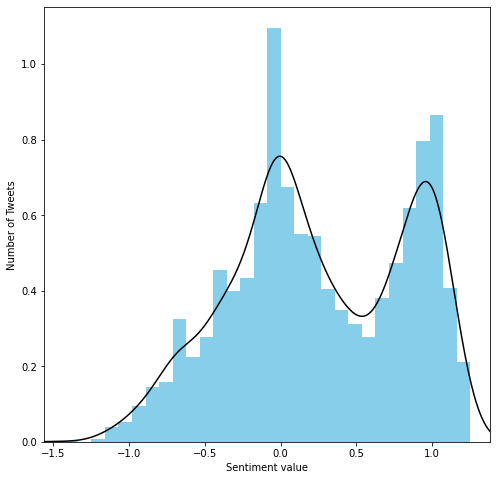

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(plot_values, density=True, bins=30, color = "skyblue")
plt.xlabel('Sentiment value')
plt.ylabel('Number of Tweets')
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde = st.gaussian_kde(plot_values)
plt.plot(kde_xs, kde.pdf(kde_xs), color = 'black')

In [ ]:
df_sentiment = df['sentiment']

In [ ]:
pos = df_sentiment[df_sentiment >= 0].count()
print("Positive Values: {}".format(pos))

Positive Values: 19700


In [ ]:
neg = df_sentiment[df_sentiment < 0].count()
print("Negative Values: {}".format(neg))

Negative Values: 7781


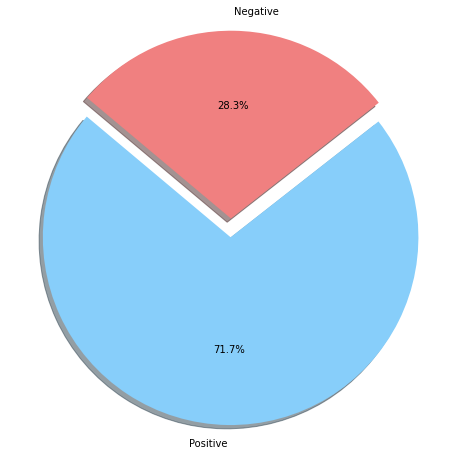

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Positive', 'Negative'
sizes = [19700, 7781]
colors = ['lightskyblue', 'lightcoral']
#, 'lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels,explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()